In [1]:
import sys
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
sys.path.append("..")

# news scraping
from src.zinfo.news_scraper import NewsScraper

# clustering
from src.zinfo.article_clustering import get_vectorized_titles
from src.zinfo.article_clustering import get_num_clusters_per_val
from src.zinfo.article_clustering import cluster_articles

# article selecting
from src.zinfo.article_selector import get_best_article_all_clusters

# when I officially started running the algorithm
start_date = "2021-08-13"

In [2]:
all_news = pd.read_csv("../data/all_news.csv")
selected_news = pd.read_csv("../data/selected_articles.csv")
all_news["date"] = pd.to_datetime(all_news.date)
all_news["day"] = all_news.date.dt.date
all_news["day"] = pd.to_datetime(all_news.day)

sources = selected_news.source.value_counts().to_dict()

In [3]:
all_news

,date,title,url,source,topic,day
0,2021-08-12 20:00:24+00:00,Open Post: Hosted By Brendan Fraser Getting Em...,https://dlisted.com/2021/08/12/open-post-hoste...,NaN,Brendan Fraser,2021-08-12
1,2021-08-12 14:45:00+00:00,"Sometimes, the Internet is Good: Brendan Frase...",https://www.pajiba.com/web_culture/sometimes-t...,NaN,Brendan Fraser,2021-08-12
2,2021-08-12 17:30:38+00:00,10 Brilliant Martin Scorsese Movies to Buy on ...,https://www.indiewire.com/shop/best-martin-sco...,NaN,Brendan Fraser,2021-08-12
3,2021-08-12 20:29:00+00:00,Watch: Brendan Fraser Gets Emotional in Respon...,https://comicbook.com/movies/news/brendan-fras...,NaN,Brendan Fraser,2021-08-12
4,2021-08-12 21:05:00+00:00,GreenPower Reports Fiscal First Quarter 2022 F...,https://finance.yahoo.com/news/greenpower-repo...,NaN,Brendan Fraser,2021-08-12
...,...,...,...,...,...,...
218002,2022-05-20 06:04:14+00:00,Chris Brown Subtly Congratulates Ex-Girlfriend...,https://www.tuko.co.ke/entertainment/celebriti...,Breaking NEWS in KENYA for Today Right Now & K...,Rihanna,2022-05-20
218003,2022-05-20 09:23:35+00:00,"I’m Finally a Grandma: Kemi Olunloyo Declares,...",https://www.legit.ng/entertainment/celebrities...,Latest News in Nigeria & Breaking Naija News 2...,Rihanna,2022-05-20
218004,2022-05-20 05:30:12+00:00,Don Jazzy Finally Breaks Silence As Rihanna We...,https://www.legit.ng/entertainment/celebrities...,Latest News in Nigeria & Breaking Naija News 2...,Rihanna,2022-05-20
218005,2022-05-20 12:35:58+00:00,“I’m finally a grandma” – Kemi Olunloyo reacts...,https://www.kemifilani.ng/entertainment/im-fin...,Kemifilani.ng,Rihanna,2022-05-20


In [4]:
selected_news

,date,title,url,source,topic,num_articles
0,2021-08-11,"'Hard Knocks' Power Rankings: Dak Prescott, Mi...",https://slashdot.org/firehose.pl?op=view&amp;i...,NaN,Hard Knocks 2021,47
1,2021-08-11,NFL playoff teams that could miss postseason i...,https://www.cbssports.com/nfl/news/nfl-playoff...,NaN,Hard Knocks 2021,4
2,2021-08-11,Chris Cuomo Defied CNN Ban On Advising His Sex...,http://www.womensystems.com/2021/08/chris-cuom...,NaN,Kerry Kennedy,271
3,2021-08-11,Messi joins PSG: Lionel Messi talks about play...,https://www.insidesport.co/messi-joins-psg-lio...,NaN,PSG,83
4,2021-08-11,Christina Applegate announces multiple scleros...,https://www.scotsman.com/health/christina-appl...,NaN,Christina Applegate,4
...,...,...,...,...,...,...
3942,2022-05-20,Harry Styles: What the critics are saying abou...,https://www.independent.ie/entertainment/music...,Independent.ie,Harry Styles,14
3943,2022-05-20,Mercedes-Benz triples record for most expensiv...,https://nypost.com/2022/05/20/mercedes-benz-tr...,New York Post,Mercedes-Benz 300 SLR Uhlenhaut Coupe,15
3944,2022-05-20,Rihanna & A$AP Rocky welcome a baby boy,https://timesofindia.indiatimes.com/entertainm...,The Times of India,Rihanna,15
3945,2022-05-20,Chip 'n Dale: Rescue Rangers Director On Ugly ...,https://screenrant.com/chip-dale-rescue-ranger...,Screen Rant,Chip and Dale,18


In [5]:
sources

{'Yahoo Entertainment': 135,
 'CBS Sports': 127,
 'USA Today': 111,
 'Independent': 76,
 'Slashdot.org': 54,
 'Daily Mail': 36,
 'Bleacher Report': 35,
 'CNA': 32,
 'Fox News': 26,
 'New York Post': 25,
 'CBS News': 24,
 'The Boston Globe': 22,
 'Reuters': 22,
 'Forbes': 20,
 'The Daily Caller': 20,
 'UPROXX': 20,
 'BBC News': 20,
 'The Times of India': 19,
 'The Guardian': 19,
 'HuffPost': 18,
 'The Indian Express': 18,
 'Toronto Star': 17,
 'New York Times': 17,
 'NBC News': 16,
 'TODAY': 16,
 'CNET': 15,
 'TheWrap': 15,
 'Marca': 15,
 'Worldsoccertalk.com': 14,
 'Snopes.com': 14,
 'CNN': 14,
 'TMZ': 13,
 'NPR': 13,
 'NDTV News': 13,
 'Freerepublic.com': 13,
 'Variety': 13,
 'Page Six': 12,
 'ComicBook.com': 12,
 'NBCSports.com': 12,
 'Independent.ie': 11,
 'Associated Press': 11,
 'Complex': 11,
 'Just Jared': 11,
 'Newsweek': 11,
 'Boston Herald': 10,
 'Eonline.com': 10,
 'CBC News': 9,
 'TheGrio': 9,
 'Decider': 9,
 'Deadline': 9,
 'Consequence.net': 9,
 'Mirror Online': 9,
 'Pere

## Tracking trending keywords over multiple days

In [13]:
remove_dup_news = selected_news.drop_duplicates(subset=["date", "topic"])
topics = remove_dup_news.topic.value_counts()
topics = topics.loc[topics >= 2].index.to_list()
long_trends = remove_dup_news.loc[remove_dup_news.topic.isin(topics)].copy()
long_trends.sort_values(by="topic", inplace=True)

In [8]:
long_trends.set_index(["topic", "date"])

In [17]:
long_trends.topic.value_counts()[:50]

Manchester United          14
Arsenal                    13
Chelsea                    12
PSG                        11
Real Madrid                10
Barcelona                  10
Lakers                      9
Champions League            8
Chiefs                      8
Packers                     7
Dallas Cowboys              7
Liverpool                   7
Spider-Man: No Way Home     5
Eagles                      5
Ben Simmons                 5
Lamar Jackson               5
Miami Dolphins              5
Cowboy Bebop                5
Gabby Petito                5
Ohio State football         5
Kim Potter                  5
Raiders                     5
Eternals                    4
Michigan football           4
Cleveland Browns            4
Pete Davidson               4
Dalvin Cook                 4
Britney Spears              4
Antonio Brown               4
F1                          4
49ers                       4
UEFA Champions League       4
Patriots                    4
Bitcoin pr

# Testing out k means

In [8]:
from sklearn.cluster import KMeans
from kneed import KneeLocator

In [9]:
def choose_best_cluster(data, end):
    inertias = []
    for i in range(1, end):
        kmeans = KMeans(n_clusters=i, random_state=0)
        kmeans.fit(data)

        inertia = kmeans.inertia_
        inertias.append(inertia)
    
    # choose best cluster num
    kneedle = KneeLocator(range(1, end), inertias, S=1.0, curve="convex", direction="decreasing")
    return kneedle.elbow, inertias

In [10]:
def get_cluster_df(news_df):
    vectors, titles = get_vectorized_titles(news_df)
    x = np.array(vectors)

    n_clusters, inertias = choose_best_cluster(x, news_df.topic.nunique())
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    kmeans.fit(x)

    return pd.DataFrame({'label': kmeans.labels_, 'title': titles, 'vectors': vectors})

In [11]:
def compare_clustering(selected_news, todays_news):
    # kmeans
    clusters = get_cluster_df(todays_news)
    k_means_selected = get_best_article_all_clusters(clusters, todays_news)
    k_means_selected["alg"] = "k_means"

    #dbscan
    selected_news["alg"] = "dbscan"

    return pd.concat([k_means_selected, selected_news])

In [12]:
selected_news.date.unique()

array(['2021-08-11', '2021-08-12', '2021-08-13', '2021-08-14',
       '2021-08-15', '2021-08-16', '2021-08-17', '2021-08-18',
       '2021-08-19', '2021-08-20', '2021-08-21', '2021-08-22',
       '2021-08-23', '2021-08-24', '2021-08-25', '2021-08-26',
       '2021-08-28', '2021-08-29', '2021-08-30', '2021-08-31',
       '2021-09-01', '2021-09-02', '2021-09-03', '2021-09-04',
       '2021-09-05', '2021-09-06', '2021-09-07', '2021-09-08',
       '2021-09-09', '2021-09-11', '2021-09-12', '2021-09-13',
       '2021-09-14', '2021-09-15', '2021-09-16', '2021-09-17'],
      dtype=object)

In [13]:
date = "2021-08-21"
selected = selected_news.loc[selected_news.date == date].copy()
todays_news = all_news.loc[all_news.day == date].copy()

In [14]:
compared = compare_clustering(selected, todays_news)

object of type 'float' has no len()
selecting best articles out of each cluster


In [15]:
compared.alg.value_counts()

dbscan     15
k_means     8
Name: alg, dtype: int64

In [16]:
compared

,date,title,url,source,topic,day,num_articles,alg
7305,2021-08-21 10:52:29+00:00,Harvey Elliott selection proves Jurgen Klopp's...,https://www.mirror.co.uk/sport/football/news/l...,Mirror Online,Liverpool vs Burnley,2021-08-21,145,k_means
7107,2021-08-21 21:37:39+00:00,Sha’Carri Richardson Said ‘Talk All The Sh*t Y...,https://uproxx.com/sports/shacarri-richardson-...,UPROXX,Sha'Carri Richardson,2021-08-21,158,k_means
7302,2021-08-21 10:31:20+00:00,Confirmed Liverpool lineup vs. Burnley: Elliot...,https://www.thisisanfield.com/2021/08/confirme...,This Is Anfield,Liverpool vs Burnley,2021-08-21,81,k_means
7238,2021-08-21 19:31:48+00:00,"Expecting Dad Travis Scott 3,000 Miles Away Fr...",https://radaronline.com/p/travis-scott-nyc-pho...,Radaronline.com,Baby,2021-08-21,47,k_means
7552,2021-08-21 04:17:18+00:00,"Tom T. Hall, Country Music’s “Storyteller,” Di...",https://pitchfork.com/news/tom-t-hall-country-...,Pitchfork,Tom T. Hall,2021-08-21,44,k_means
7340,2021-08-21 15:06:05+00:00,Hurricane Henri: What to Know as Rare Storm He...,https://www.bloomberg.com/news/articles/2021-0...,Bloomberg,Hurricane Henri,2021-08-21,72,k_means
7462,2021-08-21 02:20:24+00:00,CM Punk Makes Long-Awaited Return to Wrestling...,https://tvline.com/2021/08/20/cm-punk-returns-...,TVLine,CM Punk,2021-08-21,52,k_means
7613,2021-08-21 19:00:48+00:00,"Pacquiao vs Ugas Live Stream: Time, Fight Card...",https://decider.com/2021/08/21/manny-pacquiao-...,Decider,Pacquiao vs Ugas,2021-08-21,32,k_means
176,2021-08-21,Sha'Carri Richardson Finishes Last in 100m at ...,https://bleacherreport.com/articles/10010802-s...,Bleacher Report,Sha'Carri Richardson,NaT,3,dbscan
177,2021-08-21,'Talk all the (expletive) you want': Sha'Carri...,https://www.usatoday.com/story/sports/2021/08/...,USA Today,Sha'Carri Richardson,NaT,3,dbscan


### looking at k means graph

In [17]:
vectors, titles = get_vectorized_titles(todays_news)
x = np.array(vectors)
n_clusters, inertias = choose_best_cluster(x, 20)

object of type 'float' has no len()


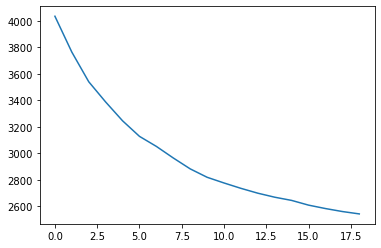

In [18]:
plt.plot(inertias)

In [19]:
n_clusters

8